# End to End Machine Learning with Deployment

### Part1- EDA of Medical Dataset 
1. Import the libraries
2. Load the data and view it
3. Clean the data 
4. Perform EDA 

### Part2- Modelling of Dataset 
5. Preprocessing
6. Fitting and Evaluation
7. Optimization
8. Interpretation
9. Model Deploytment

In [88]:
!pip install xgboost --quiet

In [89]:
!pip install streamlit --quiet


In [90]:
!pip install imbalanced-learn --quiet

In [91]:
!pip install xgboost --quiet

### Step1: Import the libraries


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

# libraries for preprocessing 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# libraries for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

print("All libraries are imported")

All libraries are imported


### Step2:Load the data and view it

In [93]:
data=pd.read_csv("data.csv")
data.head(10)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,1,85,66,29,0,26.6,0.351,31,No
2,2,8,183,64,0,0,23.3,0.672,32,Yes
3,3,1,89,66,23,94,28.1,0.167,21,No
4,4,0,137,40,35,168,43.1,2.288,33,Yes
5,5,5,116,74,0,0,25.6,0.201,30,No
6,6,3,78,50,32,88,31.0,0.248,26,Yes
7,7,10,115,0,0,0,35.3,0.134,29,No
8,8,2,197,70,45,543,30.5,0.158,53,Yes
9,9,8,125,96,0,0,0.0,0.232,54,Yes


In [94]:
data.shape

(768, 10)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [96]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,768.0,383.500000,221.846794,0.000,191.75000,383.5000,575.25000,767.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [97]:
data[~data.applymap(np.isreal).any(1)]

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Observations**
1. The dataset has 768 rows and 10 columns
2. The column 'Unnamed: 0' is redundant
3. There are no nulls 
4. However there are 0's present as null which we have to take care of
5. There are no corrupt characters

### Step3: Clean the data 

In [98]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [99]:
zerofiller=lambda x:x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, 0)

In [100]:
# encode the categorical outcome variable
df=data.copy()
d={"Yes":1, 'No':0}
df['Outcome']=df['Outcome'].map(d)

In [101]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0


### Step4: Perform EDA 
1. Univariates- NUmerical
2. UNivariates- Categorical
3. BUvariate - Categorical vs Numerical
4. Bivariate - Numerical vs Numerical 
5. MUltivaraite Pairplot
6. Correlations and Heatmpap
7. Outcome is a binary categorical variable


In [102]:
def histograms(df):
    df.hist()
    plt.tight_layout()
    plt.show()

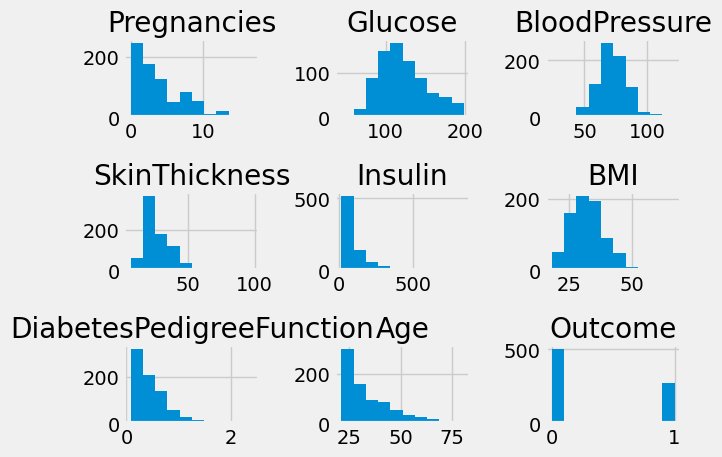

In [103]:
histograms(df)

In [104]:
def barplot(data, feature):
    print("Bar plot of the variable ", feature)
    plt.figure(figsize=(10,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    plt.show()

Bar plot of the variable  Outcome


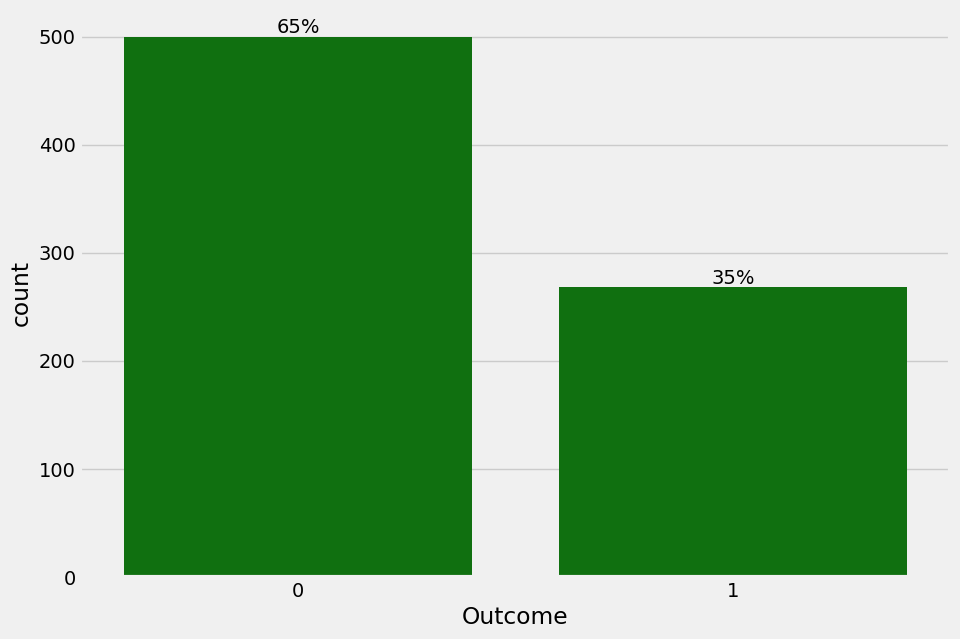

In [105]:
barplot(df, 'Outcome')

In [106]:
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print('Boxplot and Histplot for ', feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw = {"height_ratios":(0.25, 0.75)},
    figsize=figsize
    )
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplotplot(data=data, x=feature, ax=ax_hist, bins=bins)   if bins else sns.histplot(data\
                            =data, x=feature, ax=ax_hist)  
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    plt.show()
    

Boxplot and Histplot for  Pregnancies


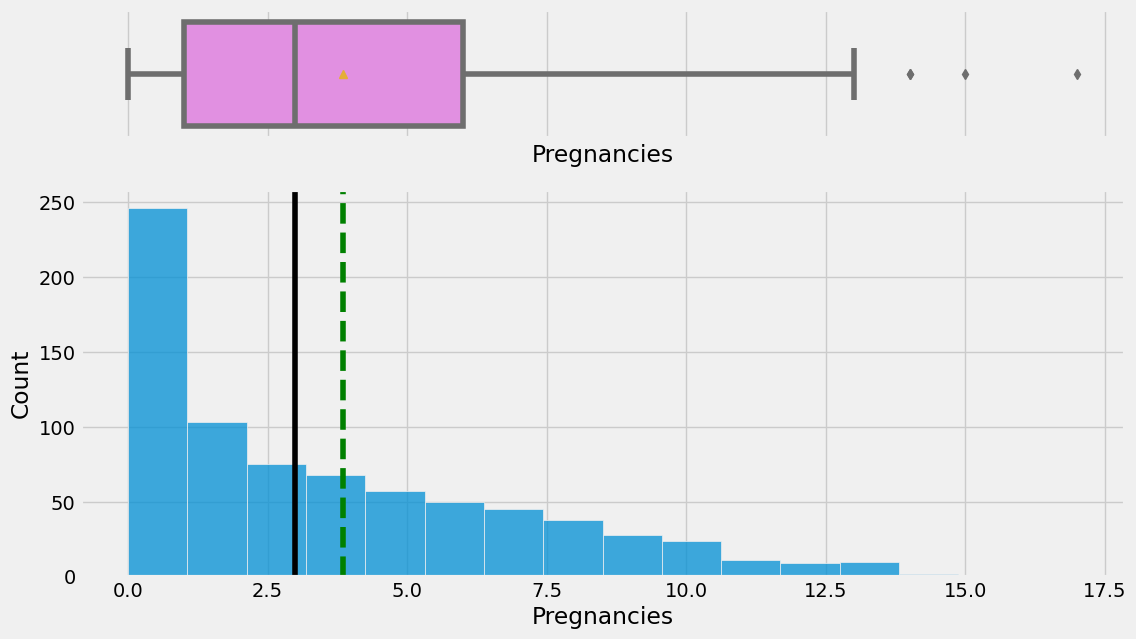

Boxplot and Histplot for  Glucose


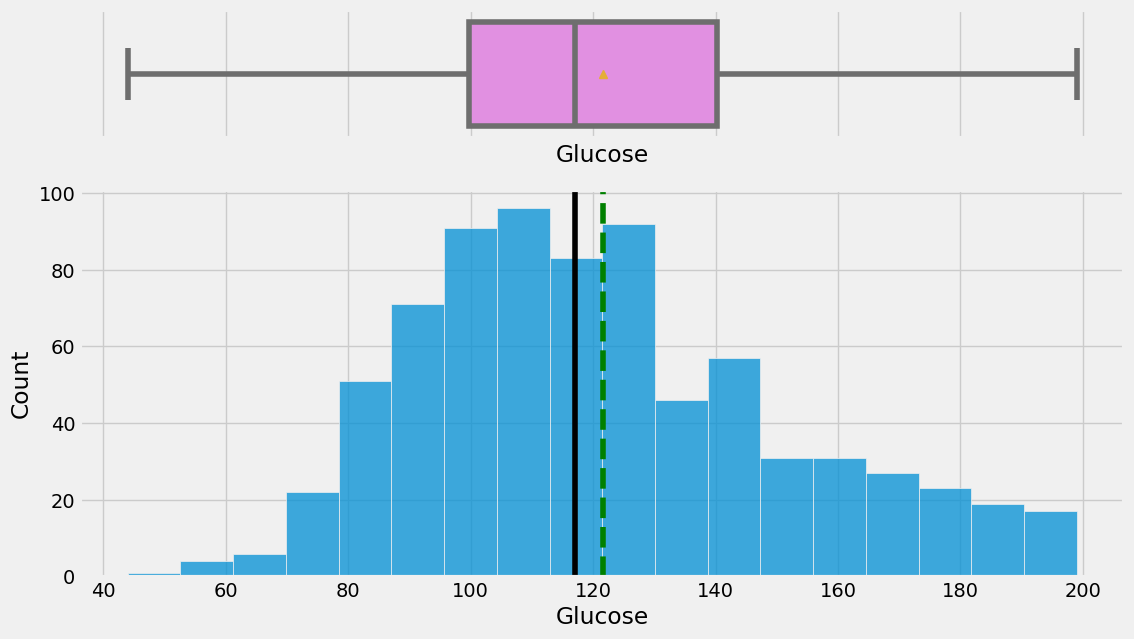

Boxplot and Histplot for  BloodPressure


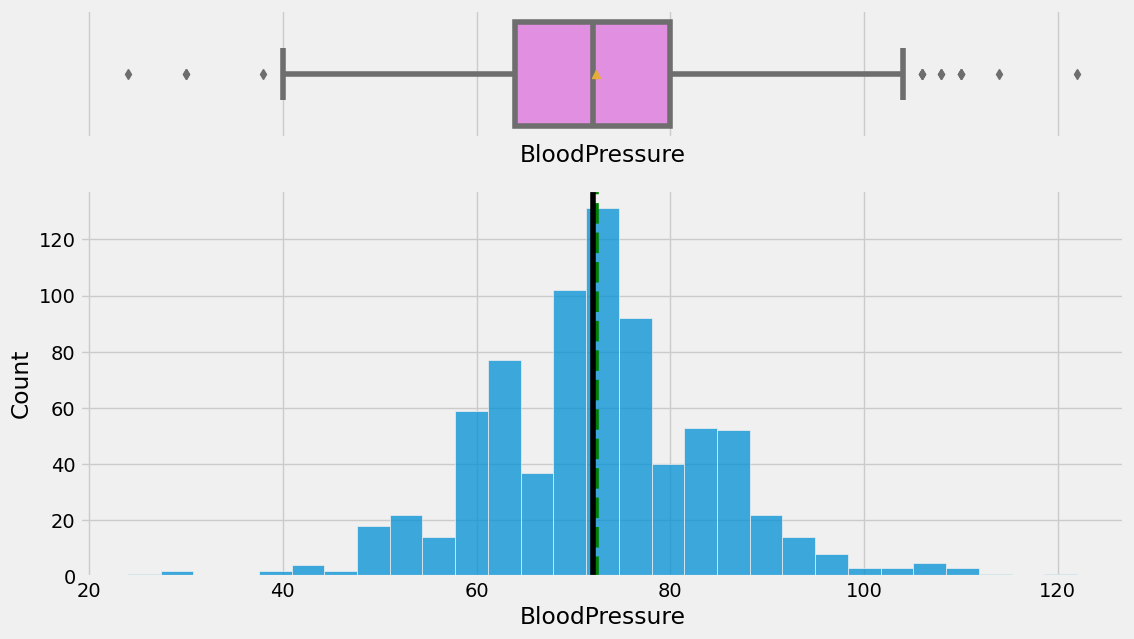

Boxplot and Histplot for  SkinThickness


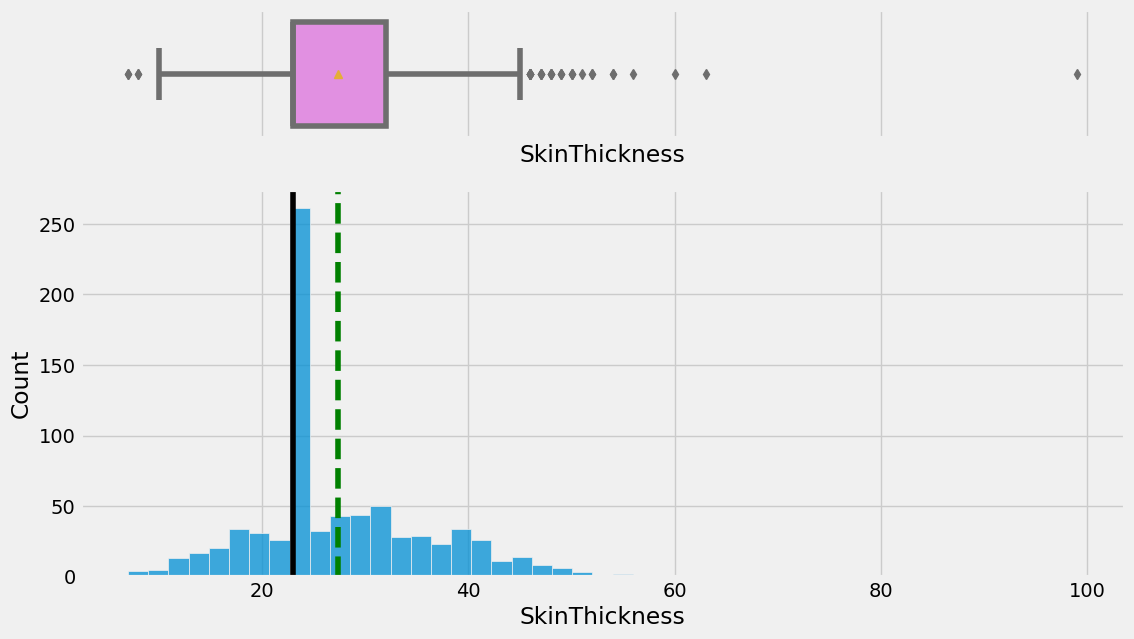

Boxplot and Histplot for  Insulin


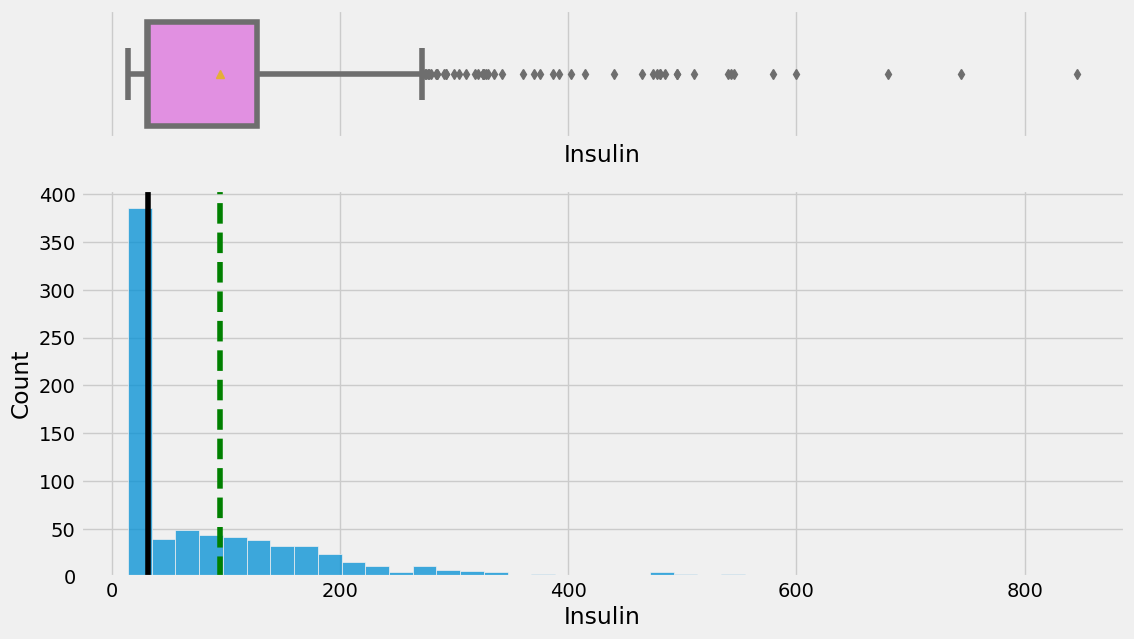

Boxplot and Histplot for  BMI


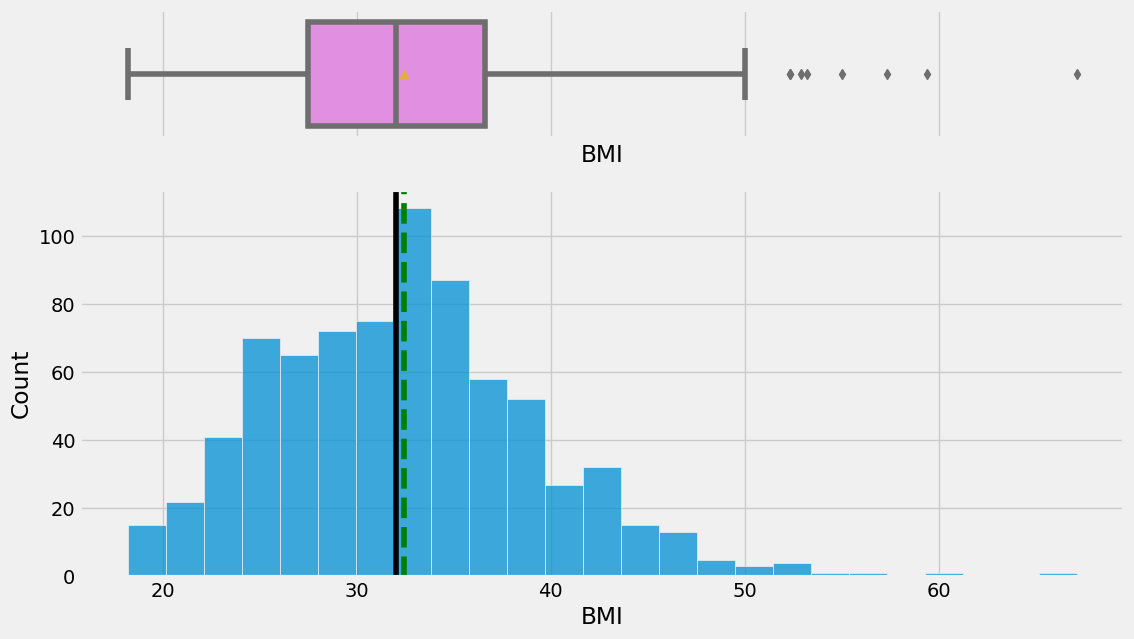

Boxplot and Histplot for  DiabetesPedigreeFunction


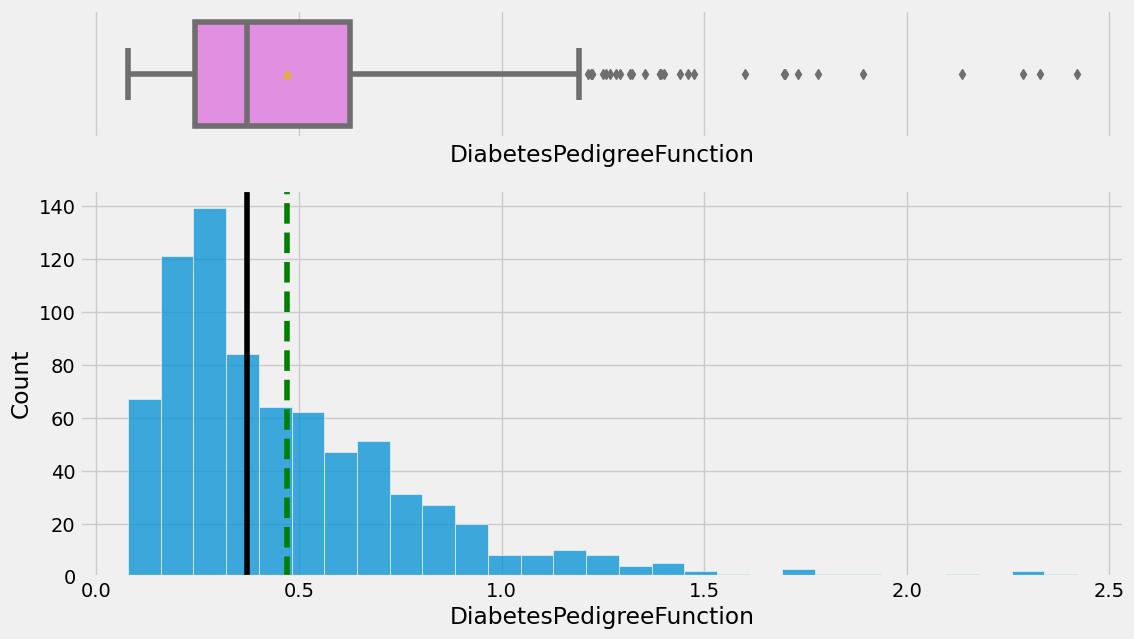

Boxplot and Histplot for  Age


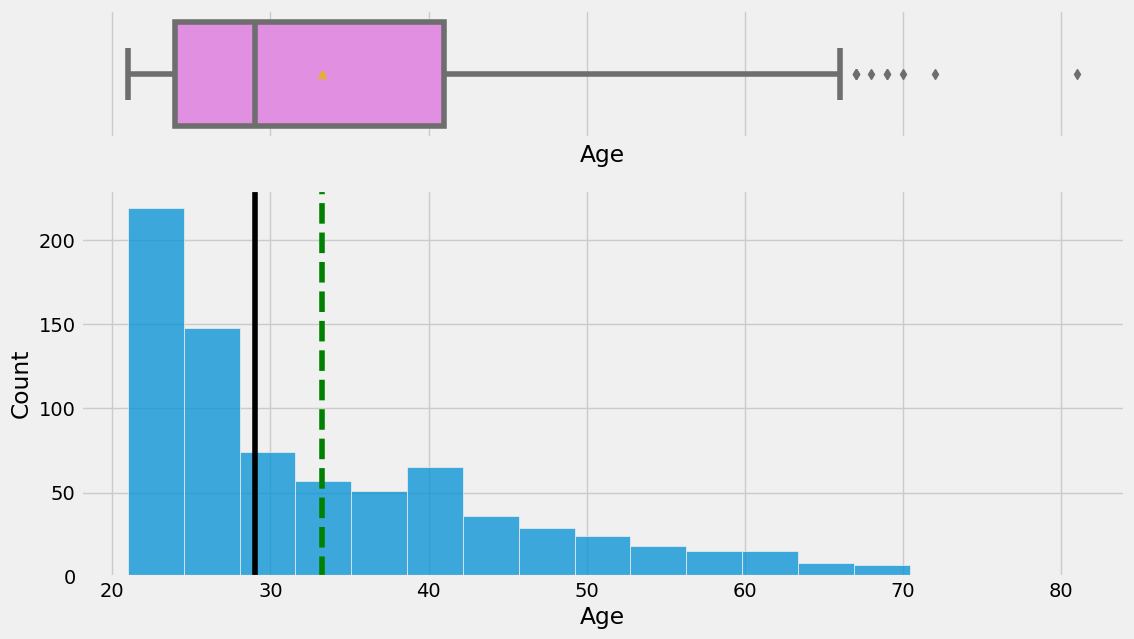

Boxplot and Histplot for  Outcome


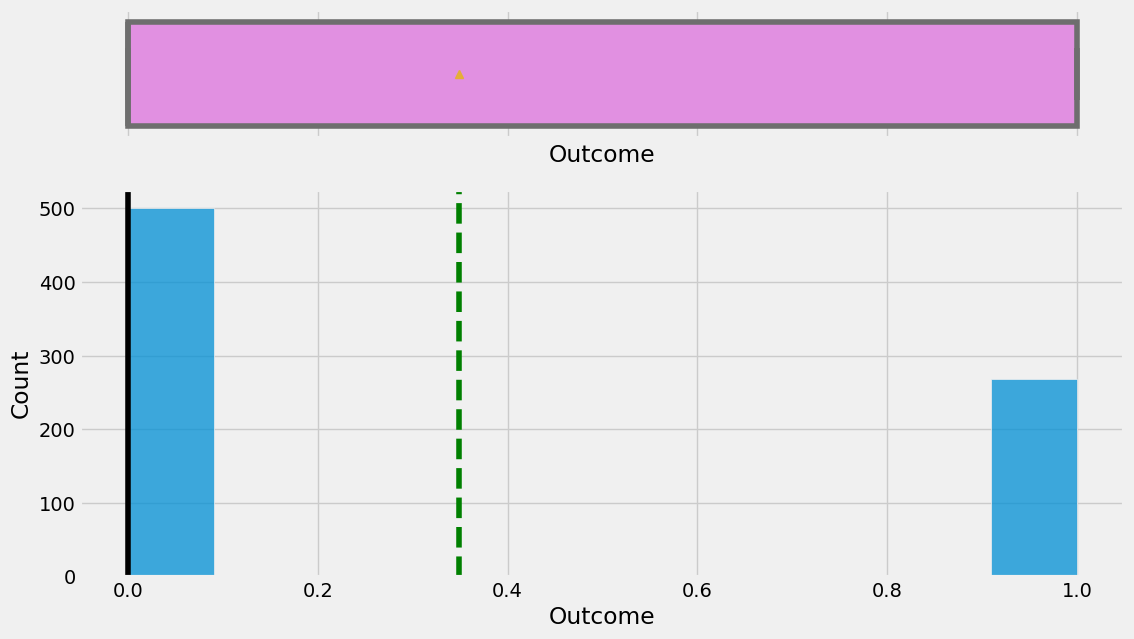

In [107]:
for col in df.select_dtypes(exclude='O').columns:
    boxplot_histplot(df, col)

**Observations**
1. We see that Pregnancies, Insulin, Dpf and Age are huighly right skewed
2. Wee see that Outcome is highly imbalanced
3. We see that skin thickness, insulin and Dpf have very high amount of outliers 

**Bivariate Analysis**

In [108]:
def catnum(data, feature1, feature2):
    print("The Bivariate barchart between {0} and {1}".format(feature1, feature2))
    data.groupby(feature1)[feature2].mean().plot(kind='bar', color='orange')
    plt.show()

The Bivariate barchart between Outcome and Pregnancies


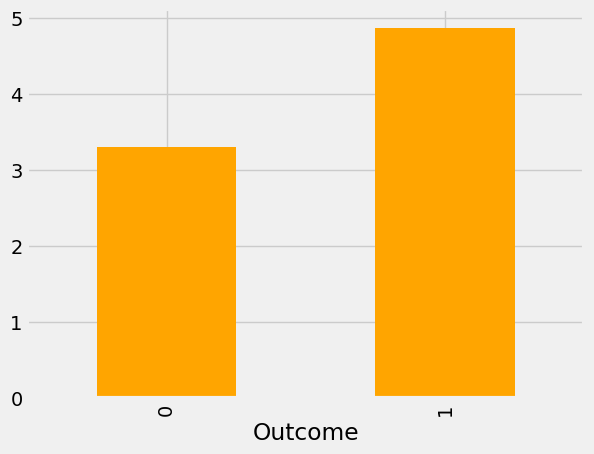

The Bivariate barchart between Outcome and Glucose


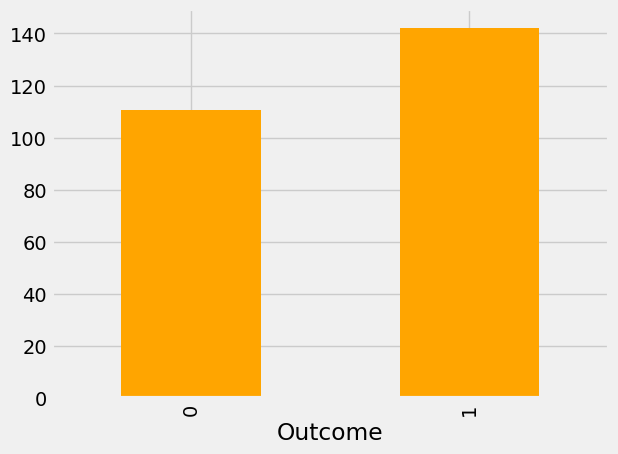

The Bivariate barchart between Outcome and BloodPressure


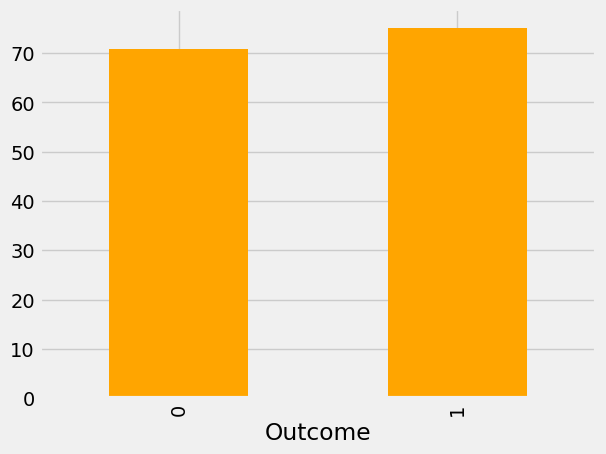

The Bivariate barchart between Outcome and SkinThickness


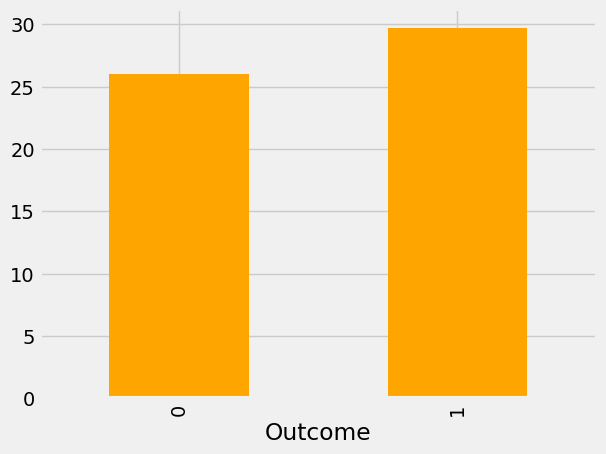

The Bivariate barchart between Outcome and Insulin


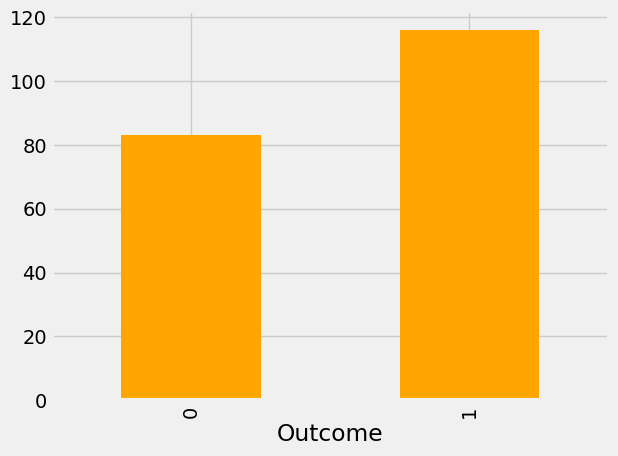

The Bivariate barchart between Outcome and BMI


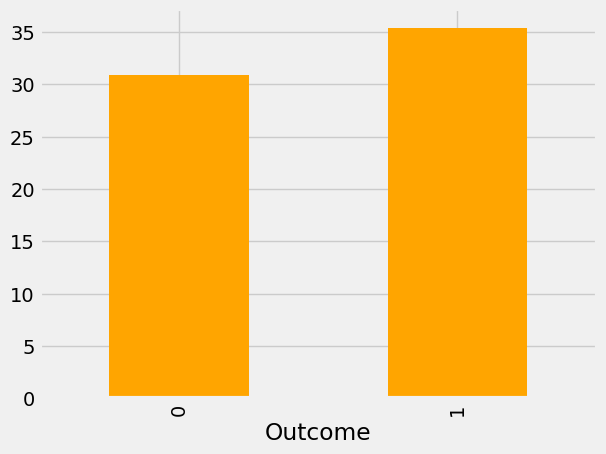

The Bivariate barchart between Outcome and DiabetesPedigreeFunction


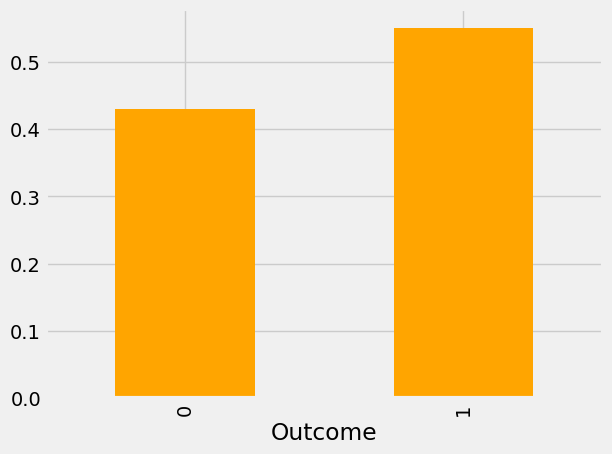

The Bivariate barchart between Outcome and Age


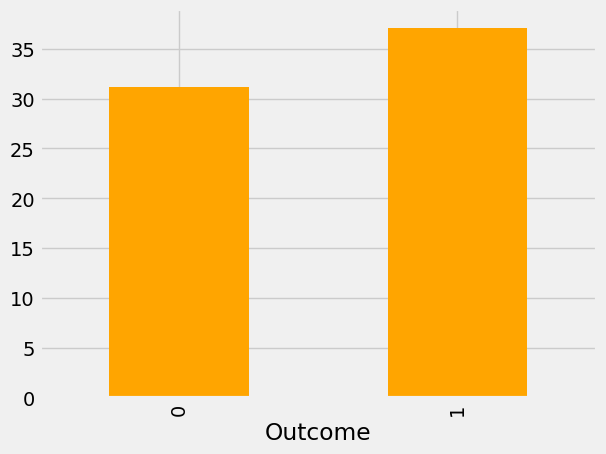

The Bivariate barchart between Outcome and Outcome


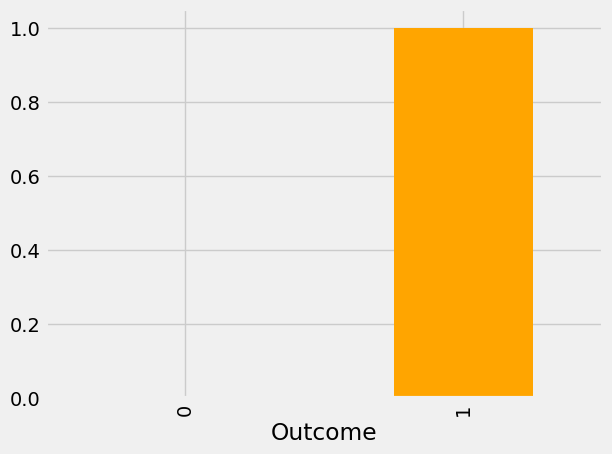

In [109]:
for col in df.select_dtypes(exclude='O').columns:
    catnum(df,'Outcome' ,col)

**Observation**
The graphs show that women with higher no.of pregnancies, hiugher glucose level, higher insulin level , higher dpf and age are more likely tobe diabetic |

In [110]:
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    print("Bivariates between {0} and {1}".format(feature1, feature2))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color='green')
    plt.title('Lineplot')
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color='blue')
    plt.title('Scatterplot')
    plt.show()
    

Bivariates between Age and Pregnancies


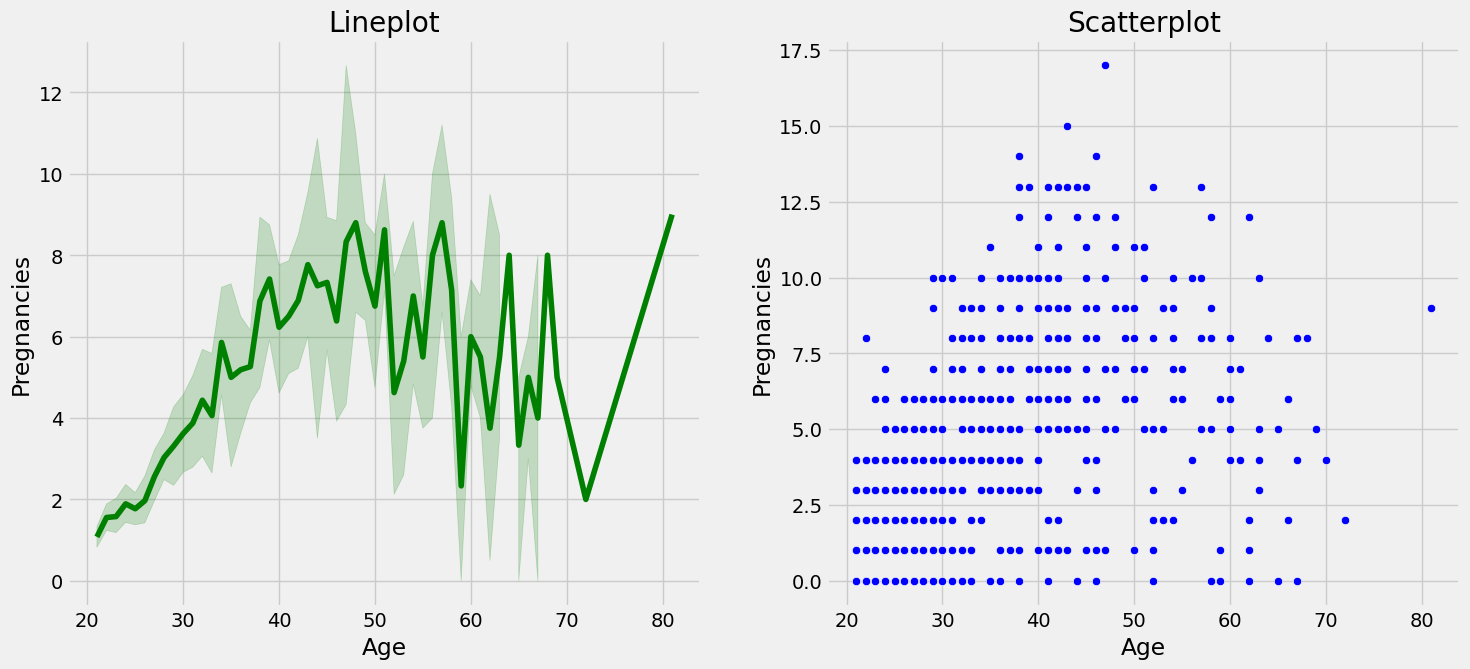

Bivariates between Age and Glucose


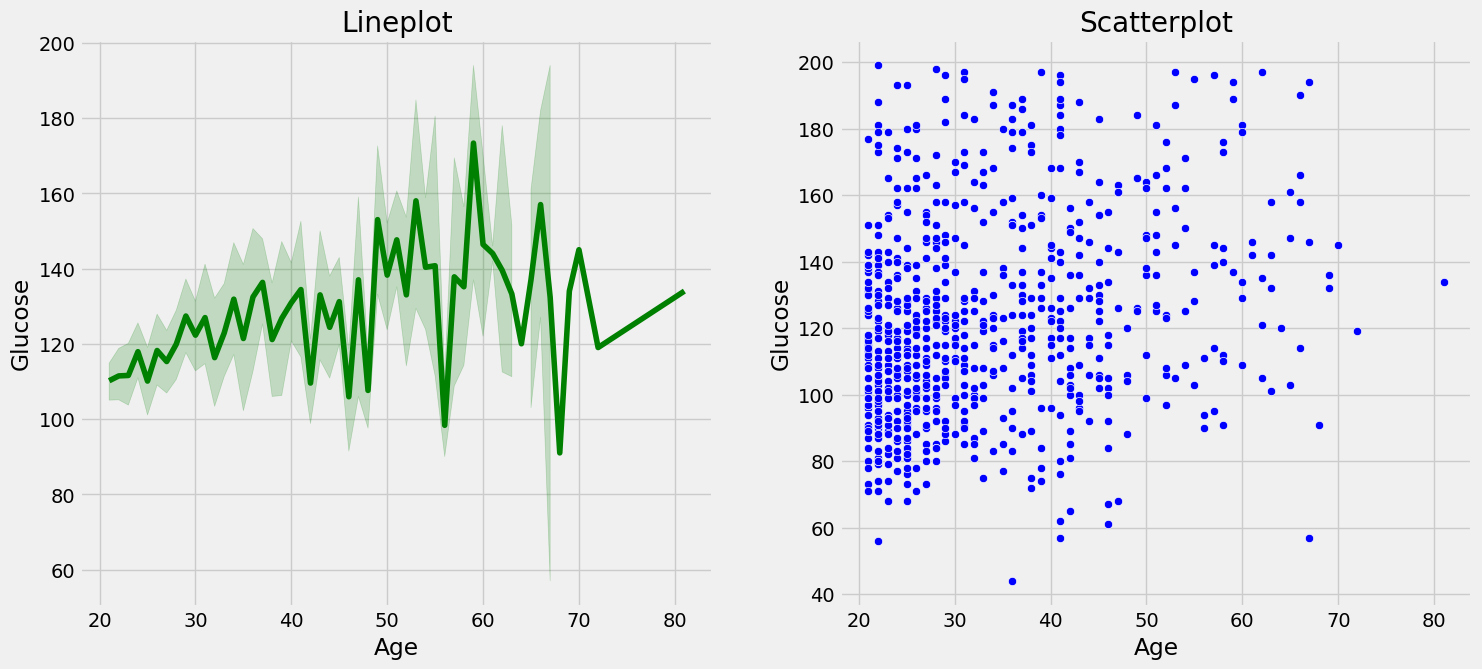

Bivariates between Age and BloodPressure


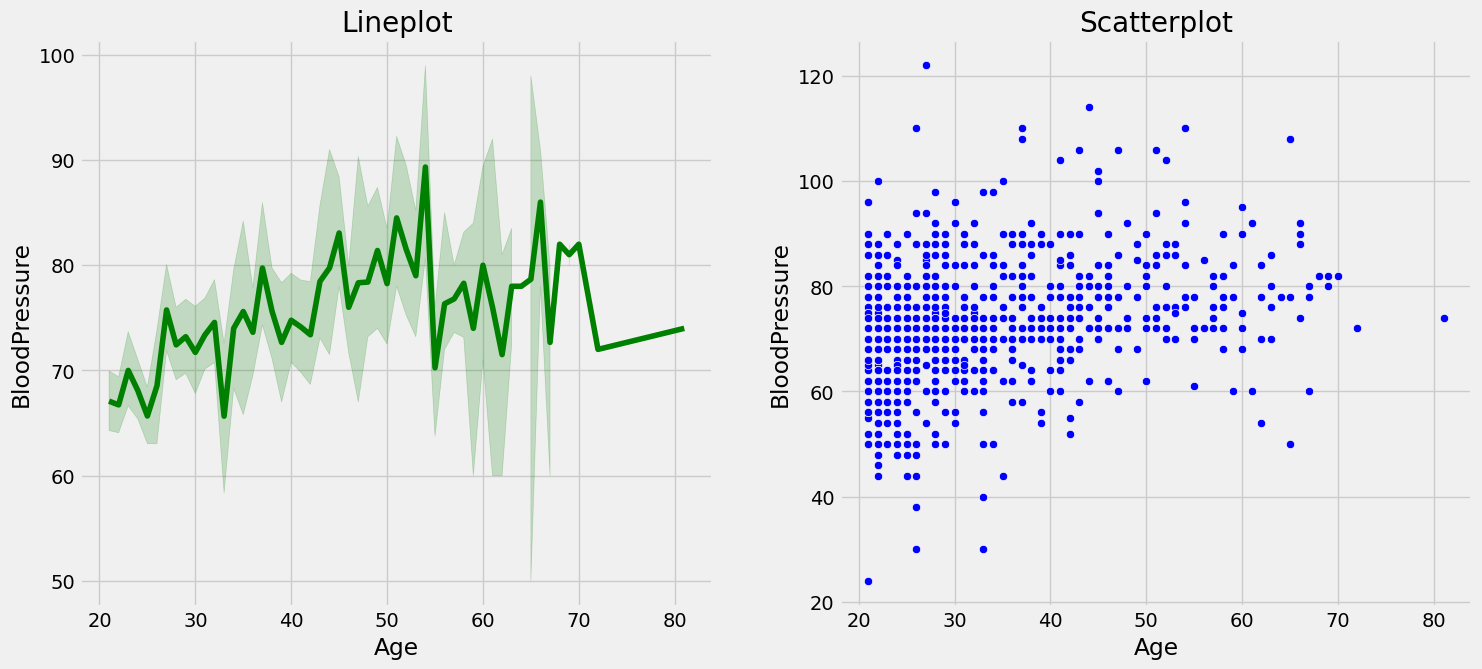

Bivariates between Age and SkinThickness


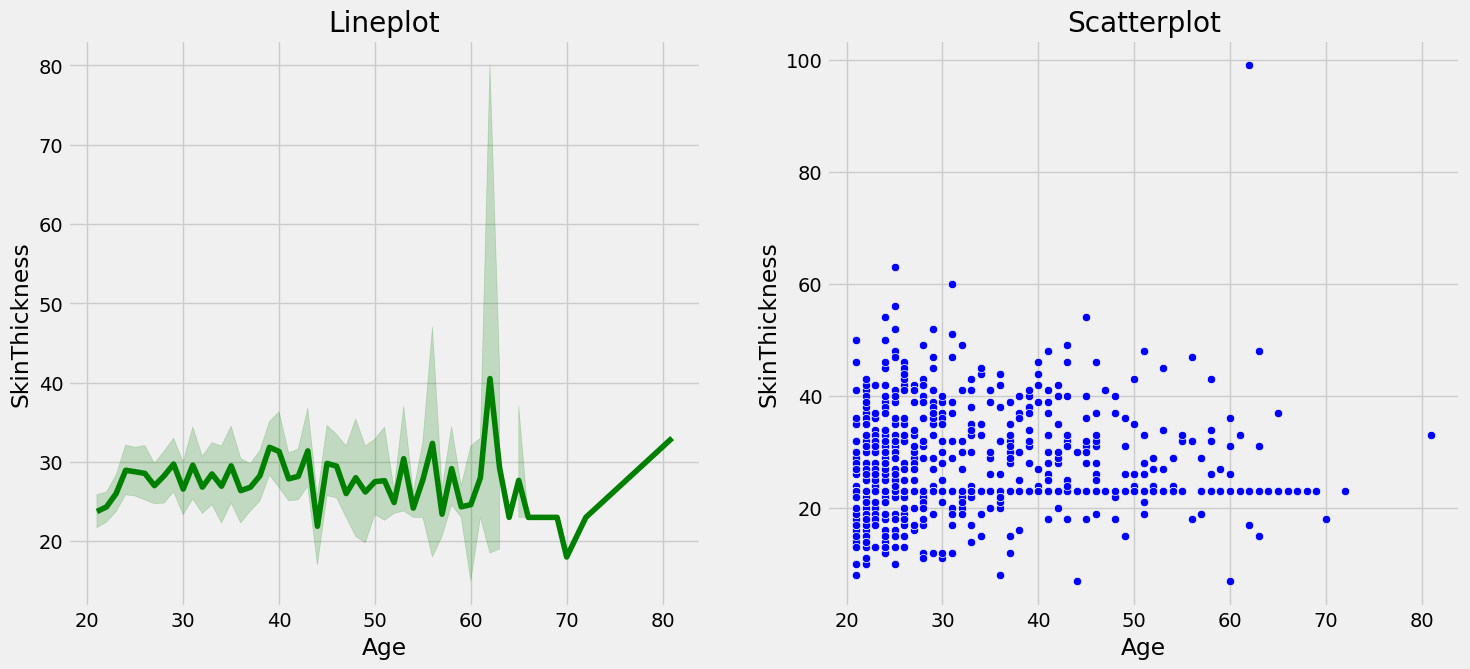

Bivariates between Age and Insulin


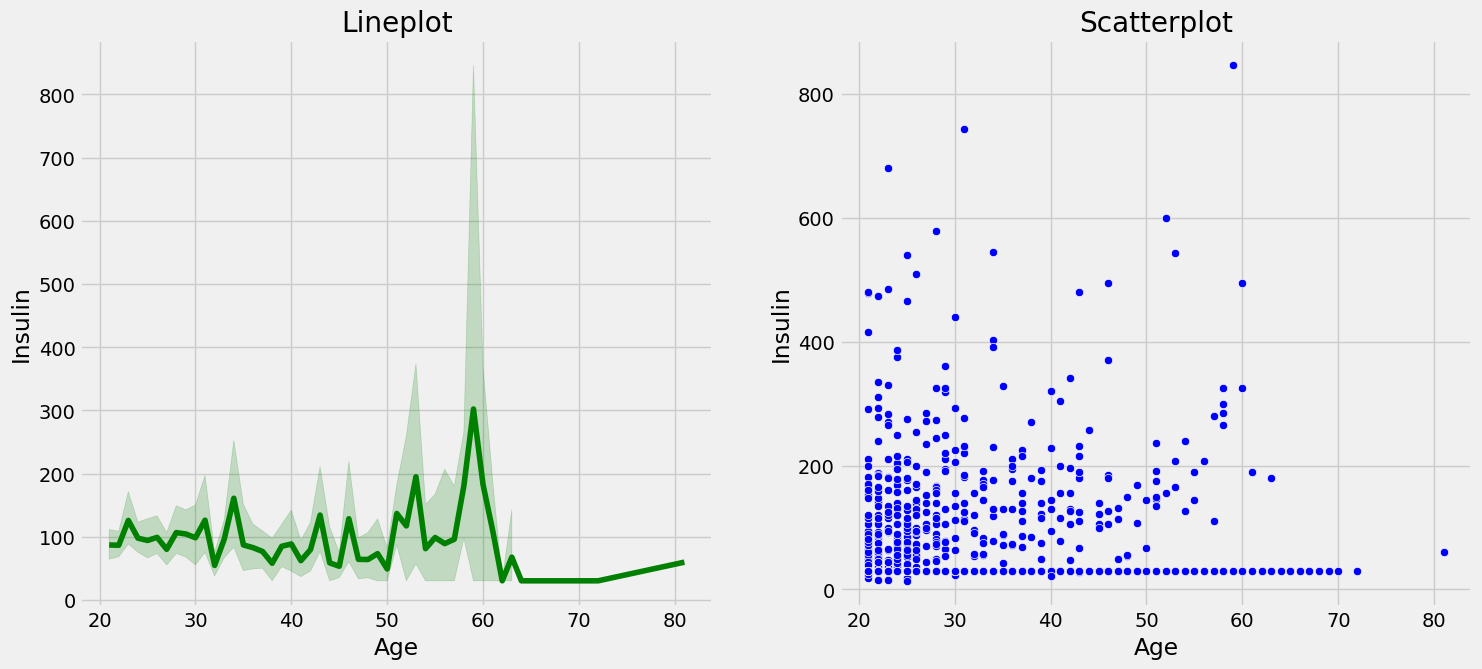

Bivariates between Age and BMI


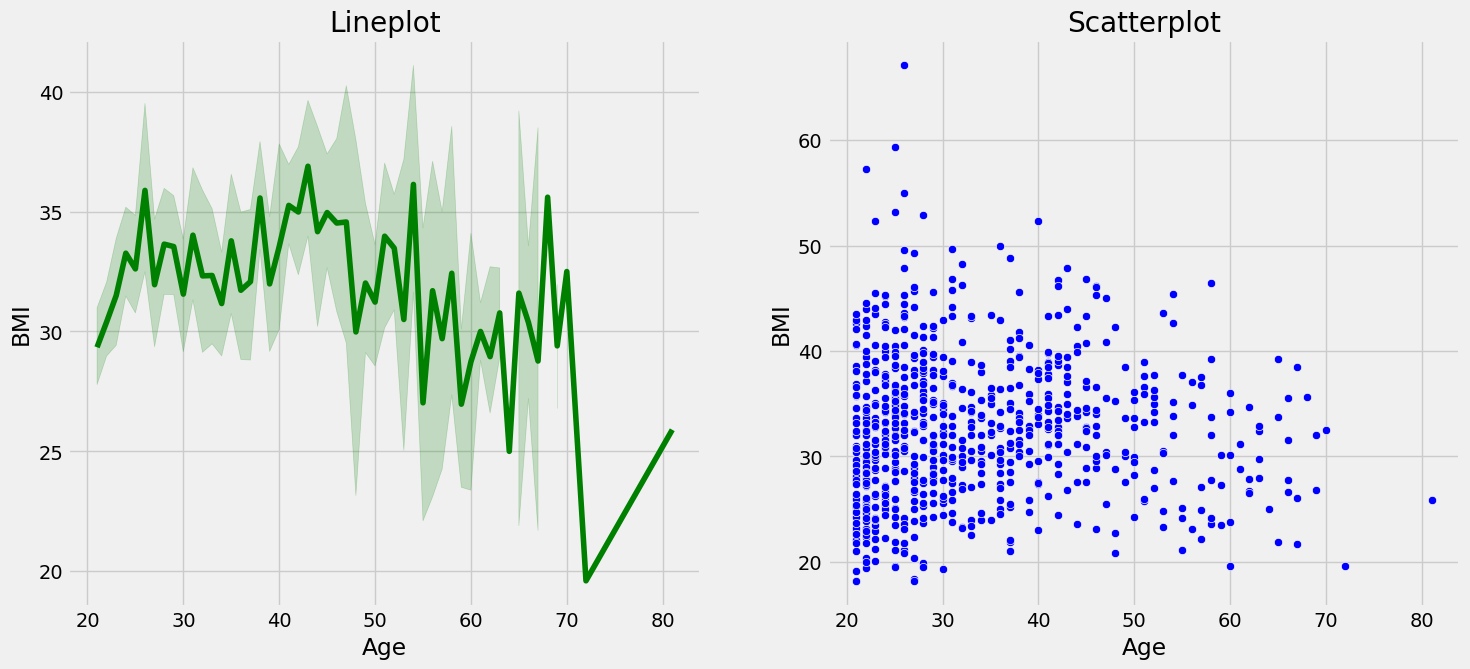

Bivariates between Age and DiabetesPedigreeFunction


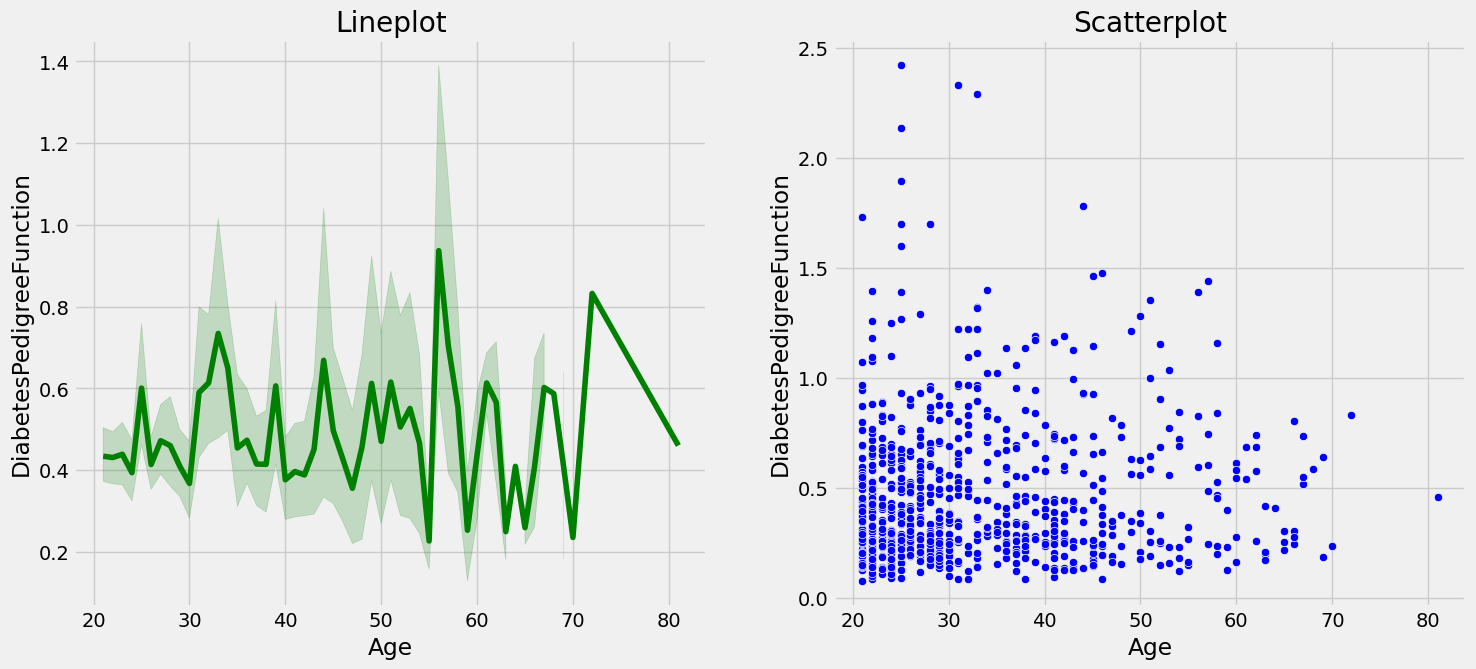

Bivariates between Age and Age


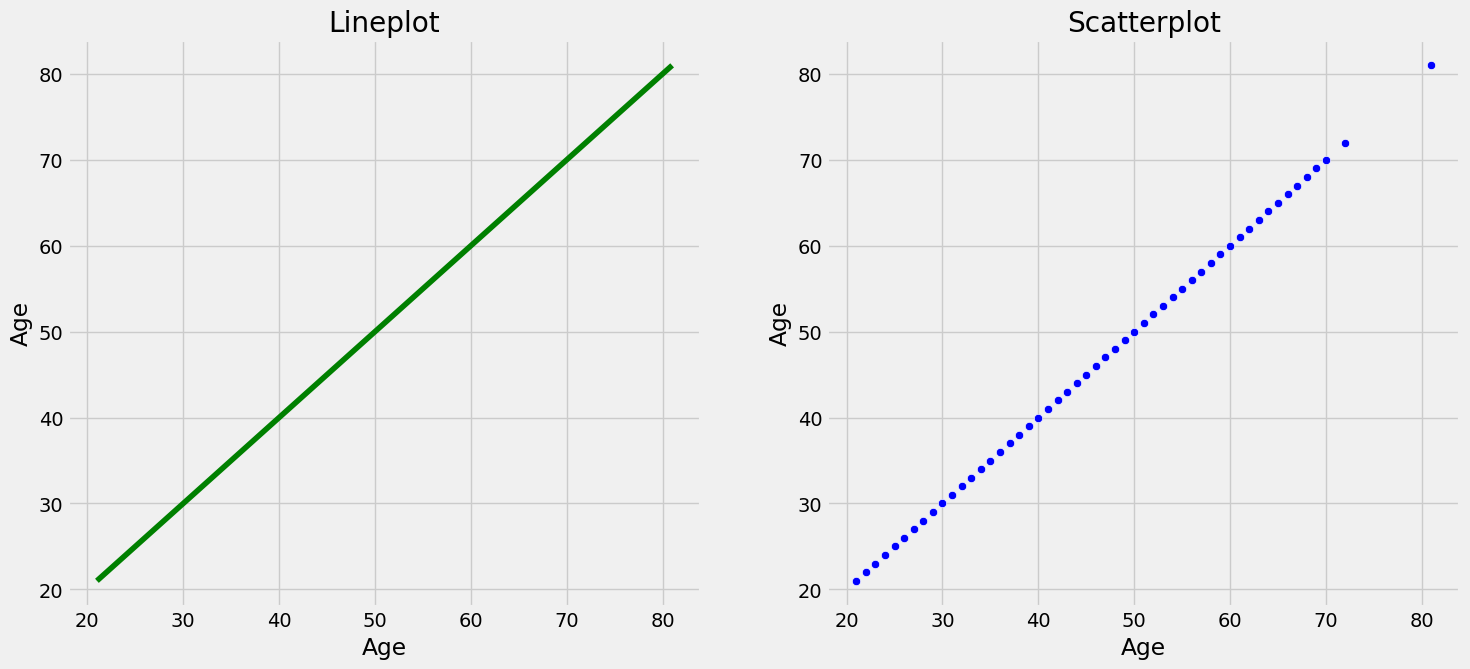

Bivariates between Age and Outcome


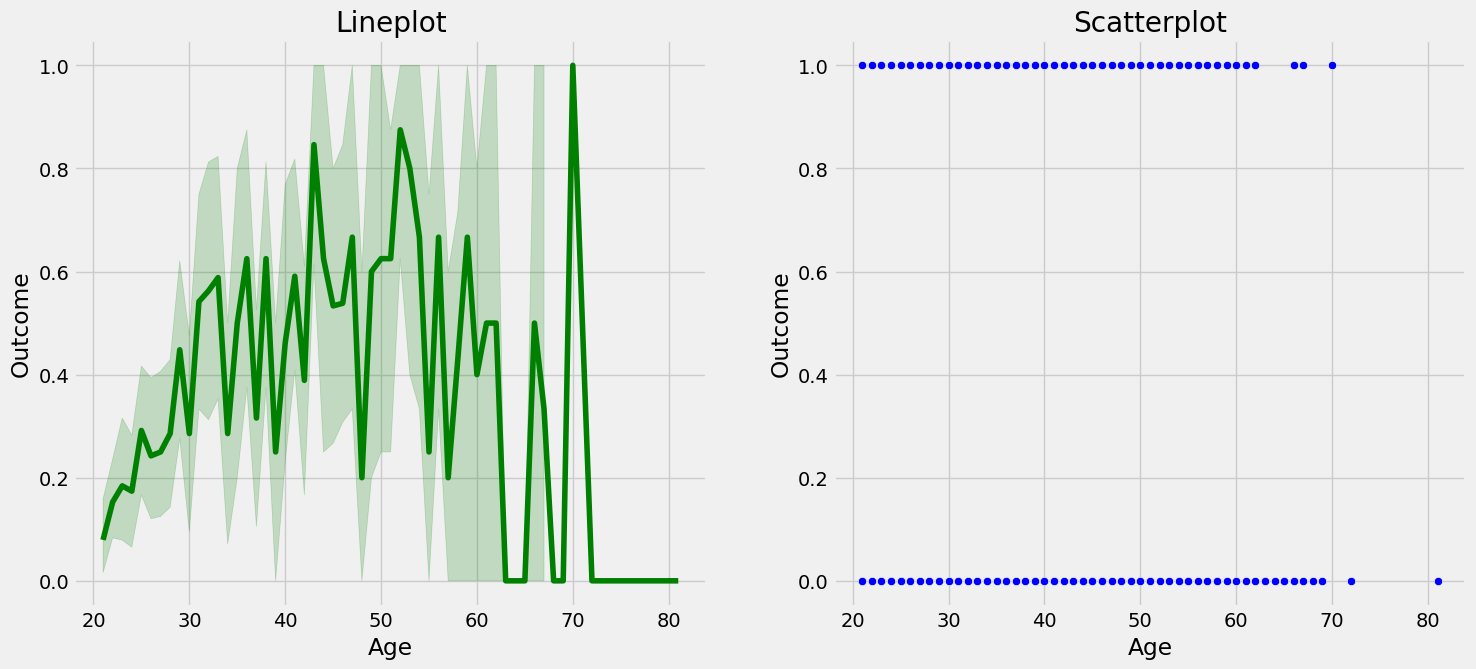

In [111]:
for col in df.select_dtypes(exclude='O').columns:
    lineplot_scatterplot(data=df,feature1='Age', feature2=col)
    

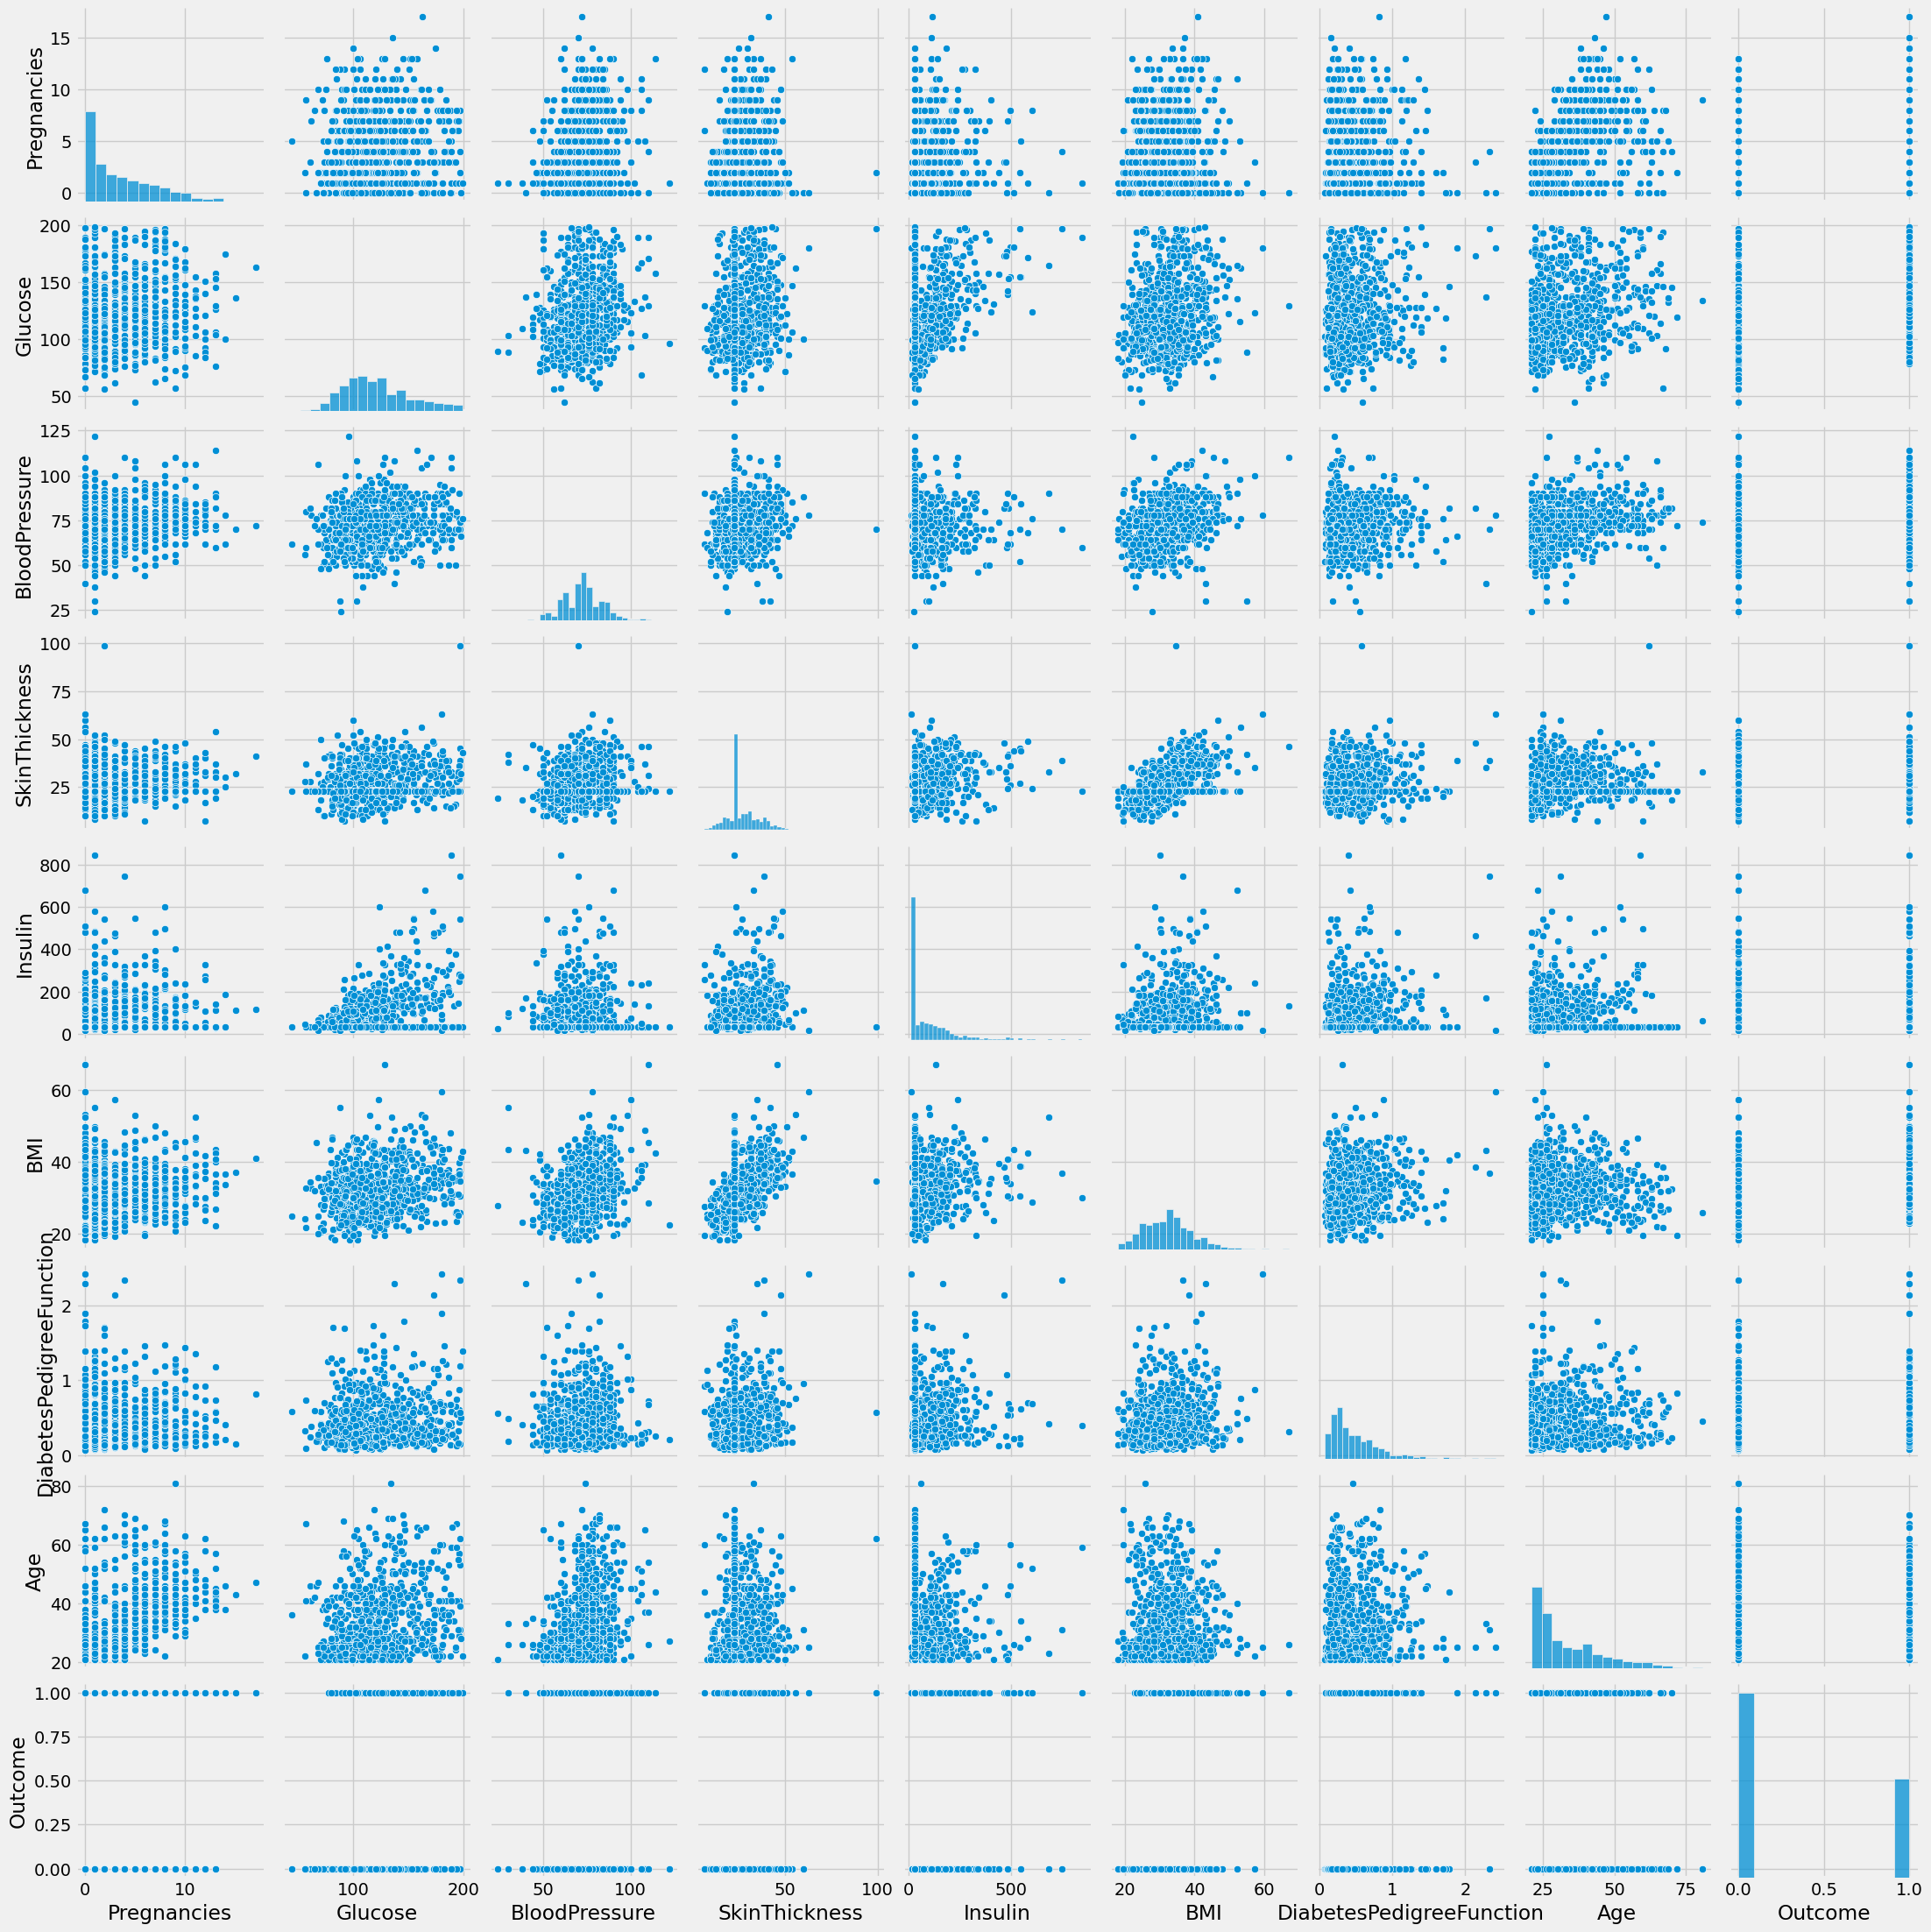

In [112]:
sns.pairplot(df)

**Observations**
There appears multicollinearity between Glucose and Insulin, BMI and skin thickness

In [113]:
# Lets look at variables most correlated with Outcome 
df[df.columns[:]].corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot: >

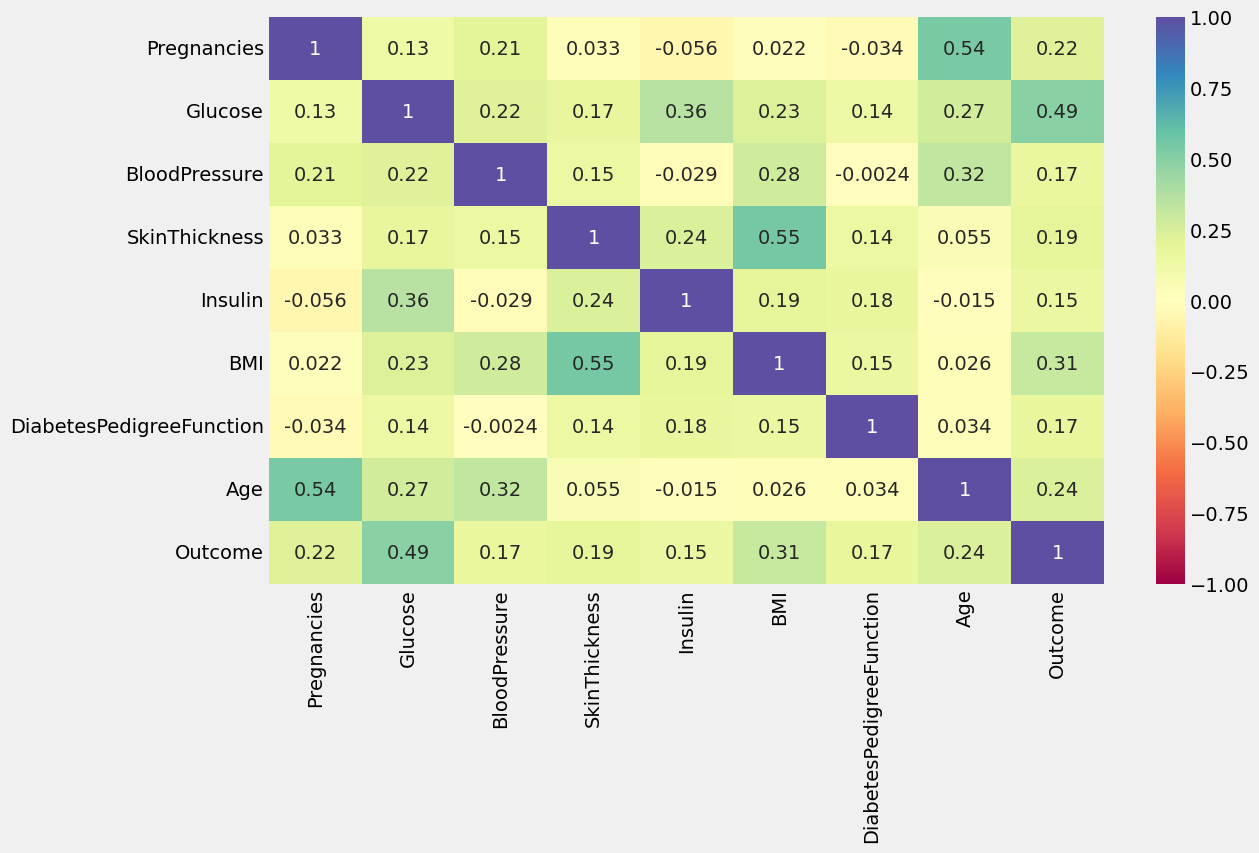

In [114]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), cmap='Spectral', vmax=+1, vmin=-1, annot=True)

**Observations**
Glucose and BMI are the strongest predictors of Outcome 

Lets create an app top display these charts 

In [115]:
#!pip install streamlit

In [116]:
%%writefile eda.py
import streamlit as st
st.title("The EDA Page")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
st.set_option('deprecation.showPyplotGlobalUse', False)
plt.style.use('fivethirtyeight')

#load and clean the data
data=pd.read_csv("data/data.csv")
data.drop('Unnamed: 0', axis=1, inplace=True)
zerofiller=lambda x:x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, 0)
# encode the categorical outcome variable
df=data.copy()
d={"Yes":1, 'No':0}
df['Outcome']=df['Outcome'].map(d)
def view_data(data):
    st.write(df.head(10))
    st.pyplot()

def histograms(df):
    df.hist()
    plt.tight_layout()
    st.pyplot()
    
def barplot(data, feature):
    print("Bar plot of the variable ", feature)
    plt.figure(figsize=(10,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    st.pyplot()
    
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print('Boxplot and Histplot for ', feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw = {"height_ratios":(0.25, 0.75)},
    figsize=figsize
    )
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplotplot(data=data, x=feature, ax=ax_hist, bins=bins)   if bins else sns.histplot(data\
                            =data, x=feature, ax=ax_hist)  
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    st.pyplot()
    
st.sidebar.subheader("Choose the Plot")
plot=st.sidebar.selectbox('plot', ('Data', 'Histograms', 'Barchart', 'Boxplot_Scatterplot', 'Correlations'))

if st.sidebar.button('PLOT'):
    if plot=='Data':
        view_data(df)
    if plot=='Histograms':
        histograms(df)
    if plot=='Barchart':
        barplot(df, feature='Outcome')
    if plot=='Boxplot_Scatterplot':
        for col in df.select_dtypes(exclude='O').columns:
            boxplot_histplot(df, col)
    if plot=='Correlations':
        plt.figure(figsize=(12,7))
        sns.heatmap(df.corr(), cmap='Spectral', vmax=+1, vmin=-1, annot=True)
        st.pyplot()
        
        
        
        

Overwriting eda.py


### Preprocessing
- seperate the features and label
- impute null
- encode categoricals
- solve data imbalace
- train test split
- standard scaling

In [117]:
# create a function to do th pre processing
def preprocess(data,label):
    
    #separate the features and label
    X = df.drop(label,axis=1)
    y=df[label]
    
    # Solve the data imbalance
    sm = SMOTE()
    X, y = sm.fit_resample(X,y)
    
    # train test split
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [118]:
X_train, X_test, y_train, y_test = preprocess(df,'Outcome')

In [119]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [120]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(700, 8) (700,) (300, 8) (300,)


**The data is ready for modelling** 

### Step 6: Fit and Evaluate the model

In [121]:
def print_metrics(y_test, y_pred, model_name):
    print('Metrics for the {}'.format(model_name))
    print('')
    print('Accuracy score', accuracy_score(y_test, y_pred))
    print('')
    print('Precision score', precision_score(y_test, y_pred))
    print('')
    print('Recall score', recall_score(y_test, y_pred))
    print('')
    print('F1 score', f1_score(y_test, y_pred))
    print('')
    print('ROC score', roc_auc_score(y_test, y_pred))
    print('Classification report')
    print(classification_report(y_test,y_pred))

In [122]:
def plot_metrics(clf, x_test, y_test, model_name):
    print('Metrics for the model')
    plot_confusion_matrix(clf, x_test, y_test, display_labels=[0,1])
    print('')
    plot_roc_curve(clf, x_test, y_test)
    print('')
    plot_precision_recall_curve(clf, x_test, y_test)

In [123]:
# Fit and evaluate the knn model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print_metrics(y_test, y_pred, 'KNN')

Metrics for the KNN

Accuracy score 0.75

Precision score 0.7087912087912088

Recall score 0.8543046357615894

F1 score 0.7747747747747747

ROC score 0.7492999688875062
Classification report
              precision    recall  f1-score   support

           0       0.81      0.64      0.72       149
           1       0.71      0.85      0.77       151

    accuracy                           0.75       300
   macro avg       0.76      0.75      0.75       300
weighted avg       0.76      0.75      0.75       300



Metrics for the model




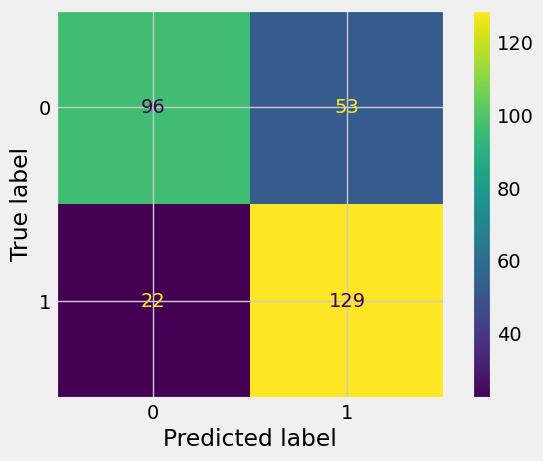

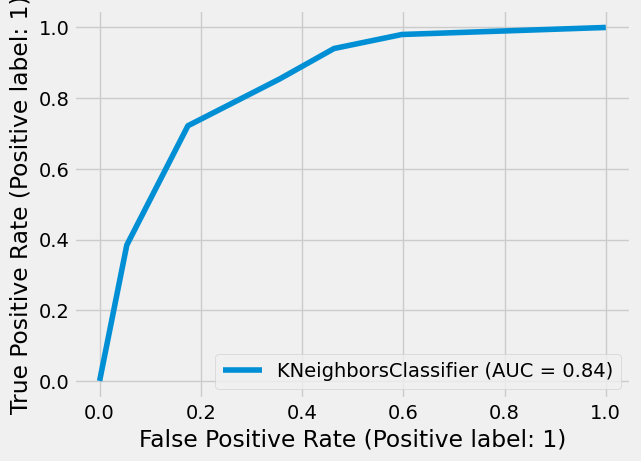

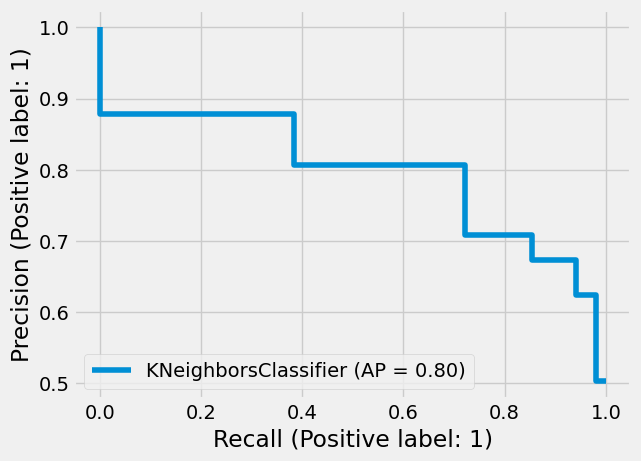

In [124]:
plot_metrics(knn, X_test, y_test, 'KNN')

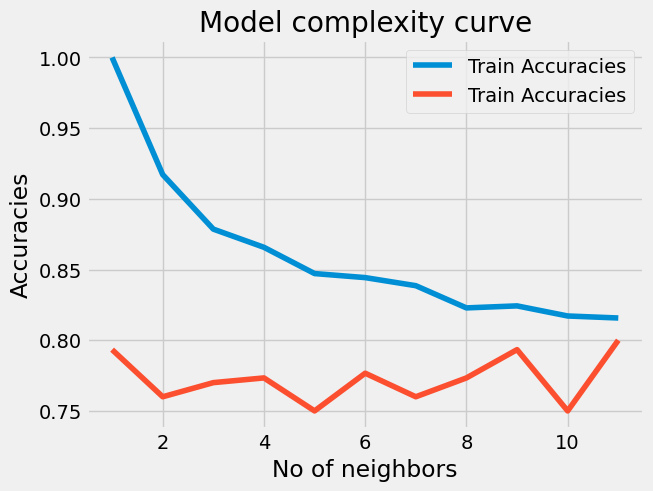

In [125]:
neighbours = np.arange(1,12)
train_accuracies = np.empty(len(neighbours))
test_accuracies = np.empty(len(neighbours))

for i, k in enumerate(neighbours):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies[i] = knn.score(X_train,y_train)
    test_accuracies[i] = knn.score(X_test, y_test)
    
# Plot model complexity
plt.title('Model complexity curve')
plt.plot(neighbours, train_accuracies, label = 'Train Accuracies')
plt.plot(neighbours, test_accuracies, label = 'Train Accuracies')
plt.legend()
plt.xlabel('No of neighbors')
plt.ylabel('Accuracies')
plt.show()

In [127]:
# refit knn with k =8
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print_metrics(y_test, y_pred, 'KNN')

Metrics for the KNN

Accuracy score 0.7933333333333333

Precision score 0.7458563535911602

Recall score 0.8940397350993378

F1 score 0.8132530120481928

ROC score 0.7926574514422863
Classification report
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       149
           1       0.75      0.89      0.81       151

    accuracy                           0.79       300
   macro avg       0.81      0.79      0.79       300
weighted avg       0.81      0.79      0.79       300



In [130]:
# lets fit all models at once and decide the one to optimize
clfs = {'logreg': LogisticRegression(),
      'KNN': KNeighborsClassifier(),
      'Naive Bayes': GaussianNB(),
      'Decision Tree': DecisionTreeClassifier(),
      'RandomForest': RandomForestClassifier(),
      'AdaBoost': AdaBoostClassifier(),
      'GradientBoost': GradientBoostingClassifier(),
      'XGBoost': XGBClassifier(),
      'SVM': SVC()}

model_report = pd.DataFrame(columns = ['Model','Accuracy','Precision','Recall','F1-Score'])

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('Fitting the model .......', clf_name)
    t= pd.Series({
        'Model': clf_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })
    model_report = model_report.append(t,ignore_index=True)
model_report = model_report.sort_values(by='F1-Score', ascending=False)
model_report

Fitting the model ....... logreg
Fitting the model ....... KNN
Fitting the model ....... Naive Bayes
Fitting the model ....... Decision Tree
Fitting the model ....... RandomForest
Fitting the model ....... AdaBoost
Fitting the model ....... GradientBoost
Fitting the model ....... XGBoost
Fitting the model ....... SVM


,Model,Accuracy,Precision,Recall,F1-Score
4,RandomForest,0.800000,0.772455,0.854305,0.811321
7,XGBoost,0.793333,0.760234,0.860927,0.807453
8,SVM,0.780000,0.754491,0.834437,0.792453
6,GradientBoost,0.776667,0.765823,0.801325,0.783172
1,KNN,0.750000,0.708791,0.854305,0.774775
0,logreg,0.753333,0.761905,0.741722,0.751678
3,Decision Tree,0.733333,0.707602,0.801325,0.751553
5,AdaBoost,0.746667,0.751678,0.741722,0.746667
2,Naive Bayes,0.736667,0.776923,0.668874,0.718861


In [132]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print_metrics(y_test, y_pred, 'RFC')

Metrics for the RFC

Accuracy score 0.7933333333333333

Precision score 0.7664670658682635

Recall score 0.847682119205298

F1 score 0.8050314465408805

ROC score 0.7929685763811725
Classification report
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       149
           1       0.77      0.85      0.81       151

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



In [133]:
param_grid ={ 'n_estimators':[100,150,200],
            'min_samples_leaf':range(1,5,1),
            'min_samples_split': range(2,10,2),
            'max_depth': [1,2,3,4,5],
            'max_features': ['sqrt','log2'],
            'criterion':['gini','entropy']}


n_folds =3

cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv = n_folds, n_jobs=-1, return_train_score= False, verbose=3)

cv.fit(X_train, y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 150, 200]},
             verbose=3)

In [134]:
cv.best_score_

0.8228177005001038

In [135]:
cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=2, min_samples_split=4)

In [136]:
rfc_tuned = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',min_samples_leaf=2, min_samples_split=4)
rfc_tuned.fit(X_train, y_train)
y_pred = rfc_tuned.predict(X_test)
print_metrics(y_test, y_pred, 'RFC_tuned')

Metrics for the RFC_tuned

Accuracy score 0.7733333333333333

Precision score 0.7344632768361582

Recall score 0.8609271523178808

F1 score 0.7926829268292682

ROC score 0.7727454553535713
Classification report
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       149
           1       0.73      0.86      0.79       151

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300



### Model interpretation

In [138]:
!pip install shap --quiet

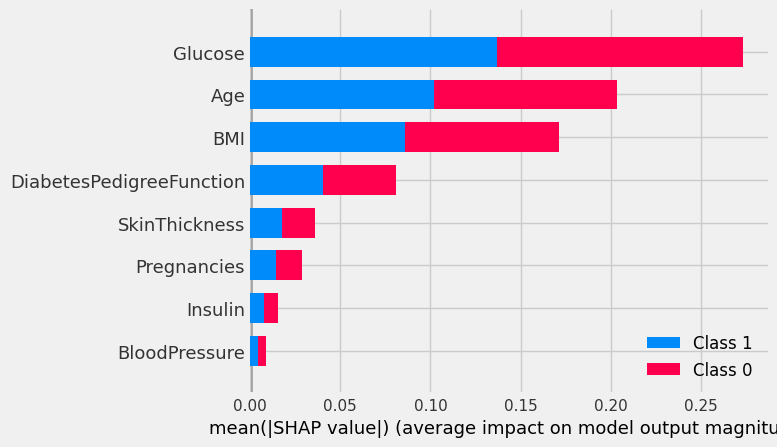

In [141]:
import shap 
X = df.drop('Outcome', axis=1)
value = shap.TreeExplainer(rfc_tuned).shap_values(X_test)
shap.summary_plot(value, X_train, plot_type='bar', feature_names = X.columns)

### Create pipeline for Model Deployment

In [143]:
from sklearn.pipeline import Pipeline
sc = StandardScaler()
rfc_tuned = rfc_tuned
X_train, X_test, y_train, y_test = preprocess(df, 'Outcome')
steps=[('scaling',sc),('rfc_tuned',rfc_tuned)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print_metrics(y_test, y_pred, 'Pipeline')

Metrics for the Pipeline

Accuracy score 0.7766666666666666

Precision score 0.7359550561797753

Recall score 0.8675496688741722

F1 score 0.7963525835866261

ROC score 0.7760567136317169
Classification report
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       149
           1       0.74      0.87      0.80       151

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.77       300
weighted avg       0.79      0.78      0.77       300



In [145]:
# Pickle the pipeline
import pickle

model = open('rfc.pickle','wb')

pickle.dump(pipeline, model)

model.close()

### Deployment of the pickled model



In [173]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle

st.title('Medical Diagnostic Web App ')

# Step1 : Load the model

model = open('rfc.pickle','rb')
clf = pickle.load(model)
model.close()

#Step 2: Get the frontend user input
pregs=st.number_input('Pregnancies',1,20, 1)

glucose = st.slider('Glucose',40.0, 200.0, 40.0)

bp = st.slider('BloodPressure',24.0, 122.0, 24.0)

skin = st.slider('SkinThickness',7.0 ,99.0 ,7.0 )

insulin =st.slider('Insulin',18.0,850.0,18.0)

bmi = st.slider('BMI',18.0,67.0,18.0)

dpf=st.slider('DiabetesPedigreeFunction',0.5,2.5,0.05)

age = st.slider('Age', 21,81,21)

#Step 3: converting user input to model input
data = {'Pregnancies':pregs, 'Glucose':glucose, 'BloodPressure':bp, 'SkinThickness':skin, 'Insulin':insulin,
       'BMI':bmi, 'DiabetesPedigreeFunction':dpf, 'Age':age}

input_data= pd.DataFrame([data])

# Step 4: Get the predictions

preds = clf.predict(input_data)[0]
if st.button('Predict'):
    if preds==1:
        st.error('The person has Diabetes')
    if preds==0:
        st.success('The person Diabetes free')

Overwriting app.py
